## Driving Map Navigator

In [38]:
geoCord = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
## {name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.4990408066, 39.7747847172]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'内蒙古', geoCoord:[111.65, 40.82]},
{name:'广西', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'宁夏', geoCoord:[106.27, 38.47]},
{name:'新疆', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.5440083200, 22.2016754600]}
"""

In [39]:
import re

In [40]:
city_information = {}
for line in geoCord.split('\n'):
    if not line.strip() or line.startswith('\\'):continue
    
    city = re.findall("name:'(\w+)'", line)
    coord = re.findall("oord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float,coord))
    city_information[city[0]] = x_y
    

In [41]:
city_information

{'上海': (121.48, 31.22),
 '兰州': (103.73, 36.03),
 '内蒙古': (111.65, 40.82),
 '北京': (116.4990408066, 39.7747847172),
 '南京': (118.78, 32.04),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '哈尔滨': (126.63, 45.75),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '宁夏': (106.27, 38.47),
 '广州': (113.23, 23.16),
 '广西': (108.33, 22.84),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '新疆': (87.68, 43.77),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54400832, 22.20167546),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

## 这里根据经纬度计算距离的程序需要修改，因为city_information是前经度、后纬度，而程序里是前纬度、后经度

In [42]:
import math

In [64]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
       math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.asin(math.sqrt(a))
    d = radius * c

    
    return d

In [65]:
def get_city_distance(origin_city, destination_city):
    return geo_distance(city_information[origin_city], city_information[destination_city])

In [67]:
get_city_distance('北京', '西安')

907.0025141990495

In [78]:
import networkx as nx

In [48]:
cities = list(city_information.keys())

In [49]:
city_graph = nx.Graph()

In [50]:
city_graph.add_nodes_from(cities)

In [51]:
nx.draw_networkx?

### 方块是因为没有对应字体

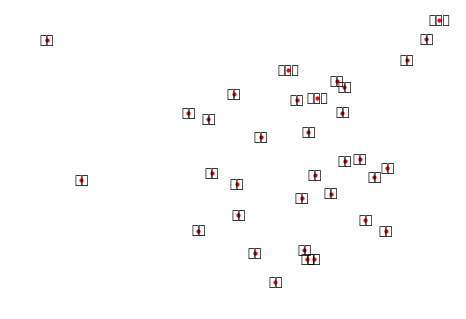

In [69]:
nx.draw(city_graph, city_information, with_labels=True, node_size=10)

In [53]:
from collections import defaultdict

In [76]:
threshhold = 800

In [77]:
    city_connection = defaultdict(list)
    
    for c in cities:
        for c2 in cities:
            if c==c2: continue
            if get_city_distance(c, c2) < threshhold:
                city_connection[c].append(c2)

In [78]:
get_city_distance('北京', '澳门')

1973.9087999613657

In [79]:
city_connection['北京']

['石家庄', '郑州', '天津', '内蒙古', '济南', '太原', '沈阳']

In [80]:
cities_connection_graph = nx.Graph(city_connection)

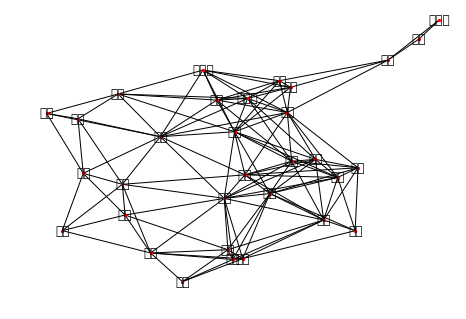

In [81]:
nx.draw(cities_connection_graph, city_information, with_labels=True, node_size=5)

In [ ]:
def search_destination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
            
        for city in graph[frontier]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
            
        seen.add(frontier)
    return chosen_pathes

In [2]:
url = "https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF"

In [3]:
import urllib

In [4]:
response = urllib.request.urlopen(url)

In [5]:
html = response.read().decode("utf-8")

In [6]:
html

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html>\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="北京地铁1号线（以下简称“1号线”），是中国最早的地铁线路。中国第一条地铁。使首都北京成为中国第一个拥有地铁的城市。而且也早于首尔、新加坡、旧金山、华盛顿等城市。毛主席亲自批示“精心设计、精心施工”。朱德、邓小平等国家领导人，北京市市长彭真亲自参加开工典礼。1969年10月1日，第一辆地铁机车从古城站呼啸驶出。北京地铁一期工程建成通车了。赶在新中国成立20周年的时候完成。宣告了中国没有地铁历史的结束。1969年10月1日开始封闭试运营，运行区段由北京站至古城站（原古城路站）。1973年4月23日，北京地铁1号线延长至苹果园站。1981年9月15日北京地下铁道一期工程正式验收，地铁一期工程运营线路从苹果园站至北京站区段正式对外开放。1987年12月28日复兴门站折返线建成。1992年12月12日由复兴门站向东延至西单站。1999年9月28日，复八线天安门西站-四惠东站区间开通。2000年6月...">\n<title>北京地铁1号线_百度百科</title>\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">\n\n<meta name="keywords" content="北京地铁1号线 复八线 北京1号线 Beijing Subway Line 1 北京地铁一线 北京地铁一号线 北京地铁1号线历史沿革 北京地铁1号线运营信息 北京地铁1号线列车 北京地铁1号线相关事件 北京地铁1号线未开放车站">\n<meta name="image" content="https://bkssl.bdimg.com/cms

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(html, 'lxml')

In [69]:
stations = soup.find("div", class_="main-content").find_all("table", class_="one")[1].find_all("th")

In [75]:
stations.pop(0)

<th>车站名称</th>

In [76]:
line_one_stations = []
for station in stations:
    line_one_stations.append(station.string)

In [77]:
line_one_stations

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东']

In [80]:
stations_graph = nx.Graph()

In [81]:
stations_graph.add_nodes_from(line_one_stations)

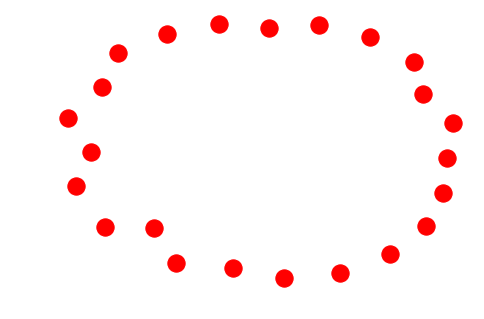

In [84]:
nx.draw(stations_graph, pos=nx.spring_layout(stations_graph))